## Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Load Cleaned Datasets

In [ ]:
benin = pd.read_csv("../data/benin_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")
sierraleone = pd.read_csv("../data/sierraleone_clean.csv")

## Adding Country Identifier

In [15]:
benin["Country"] = "Benin"
togo["Country"] = "Togo"
sierraleone["Country"] = "Sierraleone"

## Combine to Singel DataFrame 

In [16]:
combined = pd.concat([benin, togo, sierraleone], ignore_index=True)

In [17]:
print(combined.shape)
print(combined["Country"].value_counts())
combined.head()
combined.sample(10)

(1543517, 21)
Country
Benin          517860
Togo           516349
Sierraleone    509308
Name: count, dtype: int64


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,country,Country
181821,2021-12-14 09:42:00,540.3,737.0,117.6,630.8,580.0,26.0,19.5,3.8,4.6,...,97.3,8.6,995,0,0.0,45.1,34.4,NaN,Benin,Benin
934835,2022-08-16 01:33:00,-0.7,0.0,0.0,0.0,0.0,23.7,93.1,1.4,2.4,...,217.6,11.1,975,0,0.0,24.0,23.7,NaN,NaN,Togo
1002169,2022-10-02 13:04:00,746.9,259.2,492.5,752.8,745.1,29.8,70.7,2.8,4.6,...,205.2,25.1,979,0,0.0,50.0,52.2,NaN,NaN,Togo
293858,2022-03-02 20:51:00,-5.9,-0.9,-7.6,0.0,0.0,28.3,26.9,0.0,0.0,...,0.0,0.0,991,0,0.0,26.3,25.3,NaN,Benin,Benin
1385127,2022-07-06 16:16:00,140.7,0.5,140.3,133.6,126.7,27.2,90.1,0.0,0.0,...,0.0,0.0,1000,0,0.0,31.6,31.2,NaN,NaN,Sierraleone
1332342,2022-05-29 19:19:00,-0.3,-0.3,-0.2,0.4,0.4,26.9,85.4,3.0,4.1,...,189.5,16.0,999,0,0.0,27.3,27.6,NaN,NaN,Sierraleone
1537637,2022-10-25 21:44:00,-1.5,-0.3,-2.3,0.0,0.0,25.1,95.6,0.0,0.0,...,0.0,0.0,1000,0,0.0,24.6,24.9,NaN,NaN,Sierraleone
890859,2022-07-15 21:38:00,-1.5,0.0,0.0,0.0,0.0,23.9,92.4,2.9,4.1,...,261.8,11.3,976,0,0.0,23.8,23.4,NaN,NaN,Togo
781417,2022-04-29 18:25:00,-2.8,0.0,0.0,0.5,0.5,30.1,57.5,1.6,2.1,...,106.9,9.9,974,0,0.0,28.9,28.6,NaN,NaN,Togo
231165,2022-01-17 21:33:00,-3.1,-1.1,-2.7,0.0,0.0,19.9,37.0,0.9,1.3,...,39.6,3.0,1000,0,0.0,16.8,15.7,NaN,Benin,Benin


## Boxplots (GHI, DNI, DHI) by Country

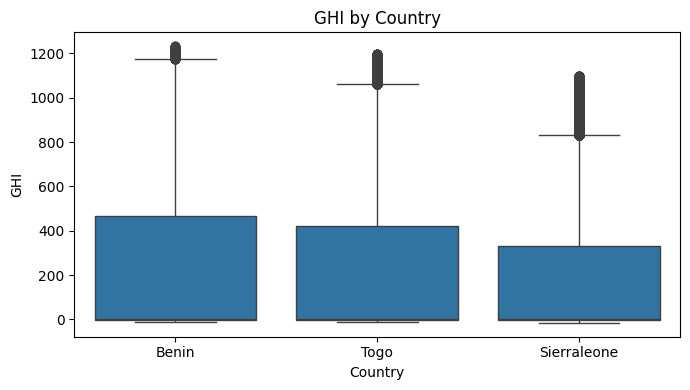

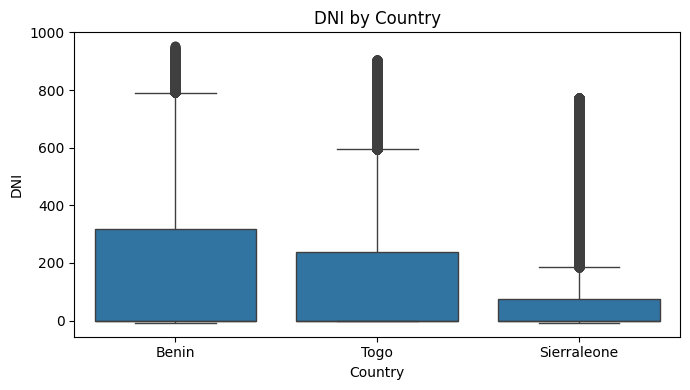

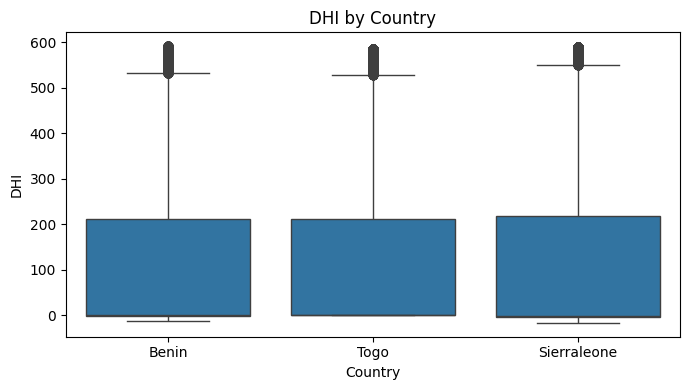

In [18]:
metrics = ["GHI", "DNI", "DHI"]
available = [m for m in metrics if m in combined.columns]

for m in available:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=combined, x="Country", y=m)
    plt.title(f"{m} by Country")
    plt.xlabel("Country")
    plt.ylabel(m)
    plt.tight_layout()
    plt.show()

## Summary Table

In [19]:
summary = (
    combined
    .groupby("Country")[available]
    .agg(["mean", "median", "std"])
    .round(2)
)

summary

GHI                    DNI                    DHI         \
               mean median     std    mean median     std    mean median   
Country                                                                    
Benin        236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierraleone  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Togo         223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   

                     
                std  
Country              
Benin        153.10  
Sierraleone  153.69  
Togo         151.57

## Statistical Testing (ANOVA/ Kruskal_Wallis)

In [21]:
from scipy.stats import f_oneway, kruskal

ghi_values = [
    combined.loc[combined["Country"] == c, "GHI"].dropna()
    for c in combined["Country"].unique()
]

# One-way ANOVA
anova_stat, anova_p = f_oneway(*ghi_values)
print(f"ANOVA F-statistic: {anova_stat:.3f}, p-value: {anova_p:.5f}")

# Kruskal–Wallis (non-parametric alternative)
kw_stat, kw_p = kruskal(*ghi_values)
print(f"Kruskal–Wallis H-statistic: {kw_stat:.3f}, p-value: {kw_p:.5f}")

if anova_p < 0.05:
    print("Significant difference detected(ANOVA).")
else:
    print("No significant difference detected(ANOVA).")

if kw_p < 0.05:
    print("Significant difference detected(Kruskal–Wallis).")
else:
    print("No significant difference detected(Kruskal–Wallis).")

ANOVA F-statistic: 3833.184, p-value: 0.00000
Kruskal–Wallis H-statistic: 6548.534, p-value: 0.00000
Significant difference detected(ANOVA).
Significant difference detected(Kruskal–Wallis).


### Key Observations

- **Benin** shows the highest average GHI, indicating the strongest solar potential among the three.
- **Sierra Leone** has moderate solar radiation but shows higher variability, suggesting more fluctuation in sunlight intensity.
- **Togo** records the lowest GHI median and mean, implying relatively weaker solar conditions.

**Statistical Summary:**  
Both ANOVA and Kruskal–Wallis tests reported p-values < 0.05, confirming that the differences in solar irradiance (GHI) between the countries are statistically significant.

## Bar Chart Ranking Countries by Average GHI

C:\Users\yamis\AppData\Local\Temp\ipykernel_26304\2968740939.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_ghi, x="Country", y="GHI", palette="crest")


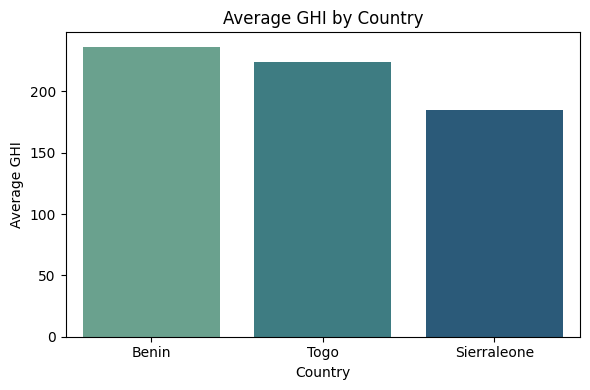

,Country,GHI
0,Benin,236.234508
1,Togo,223.859675
2,Sierraleone,185.000024


In [22]:
avg_ghi = (
    combined.groupby("Country")["GHI"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(data=avg_ghi, x="Country", y="GHI", palette="crest")
plt.title("Average GHI by Country")
plt.ylabel("Average GHI")
plt.tight_layout()
plt.show()

avg_ghi